Add you import statements in the below code block. Please make sure to import Precode.

In [16]:
# import code here
from precode import *
import numpy
import pandas as pd
import copy

data = np.load('AllSamples.npy')



Below cell contains starter code to generate the initial centers. 

* Please do not change anything apart from the student ID.

* The initial centers will be in a dictionary with keys being 'k' and value being the centers.


In [17]:
initial_centers = {}
for k in range(2, 11):
    centers = initial_S1("8606", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers


Print the last 4 digits of your student id as string in the cell below. Please make sure to only have one print statement in the cell below.

In [18]:
### TEST FUNCTION: test_student_id
# DO NOT REMOVE THE ABOVE LINE
print("8606")

8606


Add your code for computing the kMeans final centroids and loss functions in the code block below.

In [19]:
import numpy as np
import math

def eculidean_dist(sample,centroid):
    x1, y1 = sample
    x2, y2 = centroid
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def min_dist(sample, centroids, k):
    """ compute minimum distance for sample to any point in centroids"""
    cluster = 0
    #min_d = np.linalg.norm(sample-centroids[0],ord=2)
    min_d = eculidean_dist(sample, centroids[0])
    for i in range(1,k):
        #dist = np.linalg.norm(sample-centroids[i],ord=2)
        dist = eculidean_dist(sample, centroids[i])
        if (dist <= min_d):
            min_d = dist
            cluster = i

    return cluster

def centroids_equal(centroid_old, centroid_new):
    if len(centroid_old) != len(centroid_new):
        return False

    for cen1, cen2 in zip(centroid_old, centroid_new):
        if cen1 != cen2:
            return False

    return True

def update_centroids(cluster_points,k,old_centroids):
    """Calculate new centroids given cluster_points"""
    new_centroids = []
    for i, cluster in enumerate(cluster_points):
        if cluster:
            new_centroids.append(np.mean(cluster,axis=0))
        else:
            new_centroids.append(old_centroids[i])
    return np.array(new_centroids)

def loss(clusters, centroids):
    """function to calculate the loss function given clusters and centroids"""
    total_loss = 0
    for k in range(len(clusters)):
        cluster_sq = np.square(clusters[k]-centroids[k])
        total_loss += np.sum(cluster_sq)
    return total_loss


final_centroids = {}
objectives = {}
labels = {}
converge_iteration = {}

def kMeans(data, init_centers, n_iter=200, min_err=0.00005):
    """Implement kMeans with init_centers and max iteration."""
    for k in range(2, 11):
        centroids = init_centers[k]  
        centroids_old = np.zeros(centroids.shape)
        #for _ in range(n_iter):
        iter = 0
        while(True):
            cluster_points = [[] for i in range(k)]
            label = []
            for sample in data:
                cluster_num = min_dist(sample, centroids, len(centroids))
                cluster_points[cluster_num].append(sample)
                label.append(cluster_num)
            centroids_old = centroids
            centroids = update_centroids(cluster_points, k, centroids_old)
            # Check for convergence based on the change in centroids
            #if np.linalg.norm(centroids - centroids_old, ord=2) < min_err:
            iter += 1
            if np.array_equal(centroids, centroids_old):
                break
        final_centroids[k] = centroids
        objectives[k] = loss(cluster_points, centroids)
        labels[k] = label
        converge_iteration[k] = iter
kMeans(data,initial_centers)





Please use the following cell to print all the final centeriods for k in the range of 2 to 10, both inclusive.

**Notes:**
* The centeriods should have the following format: `[[x1,y1],[x2,y2],[x3,y3]][[x1,y1],[x2,y2],[x3,y3]]`
* The order of the centeriod does not matter but do NOT change the order for `x` and `y` coordinate.
* Please print the centroids from k=2 to k=10 in order and each on a new line.
* Do not print anything else in the code cell below.

**Output format:**

[[x1, y1], [x2, y2]]

[[x1, y1], [x2, y2], [x3, y3]]

.

.

.

[[x1,y1], [x2,y2].....[x9,y9]]

In [20]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE THE ABOVE LINE
for k in range(2,11):
    cnt = len(final_centroids[k])
    print('[',end='')
    for it in range(0,cnt-1):
        print('[',end='')
        print(f'{final_centroids[k][it][0]},',end='')
        print(f'{final_centroids[k][it][1]}',end='')
        print('],',end='')
    print('[',end='')
    print(f'{final_centroids[k][cnt-1][0]},',end='')
    print(f'{final_centroids[k][cnt-1][1]}]',end='')
    print(']')


[[5.000562341588762,2.4854274751531933],[4.852611930287174,7.271641711202775]]
[[2.6194686848974693,5.965194768533931],[6.497249620849709,7.522972929895171],[5.555241823602507,2.1898095818920966]]
[[3.3274505436703654,2.566008810497073],[3.153427001856,6.91292070093253],[6.856583330228901,7.661434199806484],[7.380762638700798,2.332455315679148]]
[[7.414192434680615,2.3216911383868664],[3.145061482959145,0.9077065486588153],[6.603458393504191,7.570421042158782],[3.4955665791995627,3.5661123157286907],[2.8170660577092272,7.010912998148725]]
[[5.464277356727894,6.837713536435891],[7.756483249146484,8.556689279063415],[7.414192434680615,2.3216911383868664],[3.145061482959145,0.9077065486588153],[2.5633381461259046,6.978224800606624],[3.4955665791995627,3.5661123157286907]]
[[2.214068054222364,3.286445548570339],[7.556167822397726,2.235167959857534],[3.1660397272577874,0.8616886118323305],[2.5633381461259046,6.978224800606624],[4.8681371322300135,3.719341848215456],[7.756483249146484,8.5566

Please use the following cell to print all the final loss functions for k in the range of 2 to 10, both inclusive.

**Notes:**

* Print the loss functions for every value of k on a new line and in order.
* Do not print anything else in the code cell below.

**Output format:**

L1

L2

.

.

.

L9


In [21]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE THE ABOVE LINE
for k in range(2,11):
    print(objectives[k])

1921.0334858562062
1294.2984174853177
792.4220367717107
649.9266570480958
476.118751676353
367.5988212640432
289.9327260448384
232.27848278050436
182.79227118296333


**This part of the project is manually graded.**

Use the cells below to write the code for generating the loss function plot.

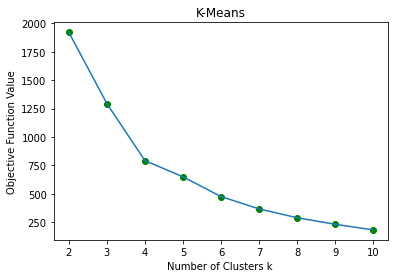

In [22]:
# plot showing # of clusters and their loss functions
import matplotlib.pyplot as plt 
def plot_graph(objectives=None):
    clusters = [x for x in range(2,11)]
    loss = []
    for cluster in clusters:
        loss.append(objectives[cluster])
    plt.plot(clusters, loss)
    plt.scatter(clusters,loss,color='green')
    plt.xlabel('Number of Clusters k ')
    plt.ylabel('Objective Function Value')
    plt.title('K-Means')
    plt.show()

plot_graph(objectives)


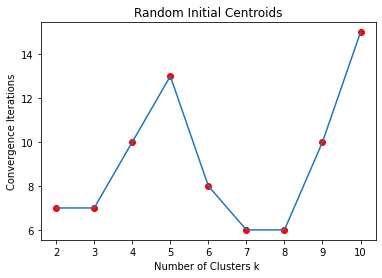

In [23]:
# plot showing # of clusters and convergence iterations 
import matplotlib.pyplot as plt 
def plot_iter(iterations=None):
    clusters = [x for x in range(2,11)]
    iter_cnt = []
    for iter in iterations:
        iter_cnt.append(iterations[iter])
    plt.plot(clusters, iter_cnt)
    plt.scatter(clusters,iter_cnt,color='red')
    plt.xlabel('Number of Clusters k ')
    plt.ylabel('Convergence Iterations')
    plt.title('Random Initial Centroids')
    plt.show()

plot_iter(converge_iteration)

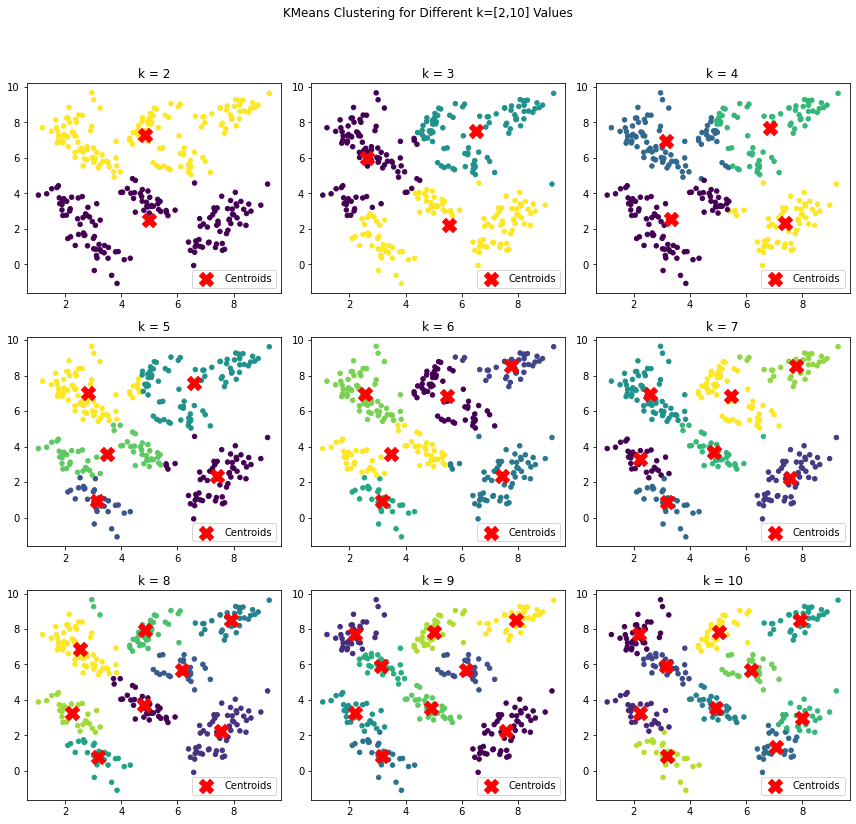

In [24]:
# output the clustering for k = [2,10]
# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('KMeans Clustering for Different k=[2,10] Values')

# Flatten the 3x3 array of subplots for easy indexing
axes = axes.flatten()
k_values = range(2, 11)

for i, k in enumerate(k_values):
    # labels for the data 
    label = labels[k]
    centroids = final_centroids[k]

    # Plot the clusters
    axes[i].scatter(data[:, 0], data[:, 1], c=label, cmap='viridis', s=20)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    
    axes[i].set_title(f'k = {k}')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()